In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

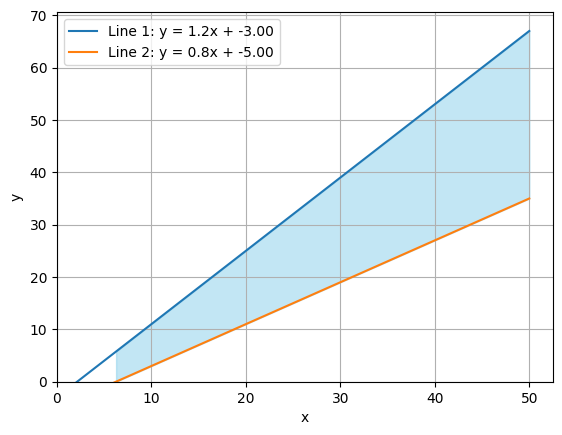

In [23]:
def plot_filled_area_between_lines(c1, c2, x_range=(0, 50)):
    
    m1 = 1.4
    m2 = 0.8

   
    x_values = np.linspace(x_range[0], x_range[1], 400)

    
    y1 = m1 * x_values + c1
    y2 = m2 * x_values + c2

    
    plt.plot(x_values, y1, label='Line 1: y = 1.2x + {:.2f}'.format(c1))
    plt.plot(x_values, y2, label='Line 2: y = 0.8x + {:.2f}'.format(c2))

    
    plt.fill_between(x_values, y1, y2, where=(y1>y2) & (y1>0) & (y2>0), color='skyblue', alpha=0.5)
    plt.fill_between(x_values, y1, y2, where=(y2>y1) & (y1>0) & (y2>0), color='skyblue', alpha=0.5)

   
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

    plt.xlim(left=0)
    plt.ylim(bottom=0)
    
    plt.show()


plot_filled_area_between_lines(c1=-3, c2=-5)


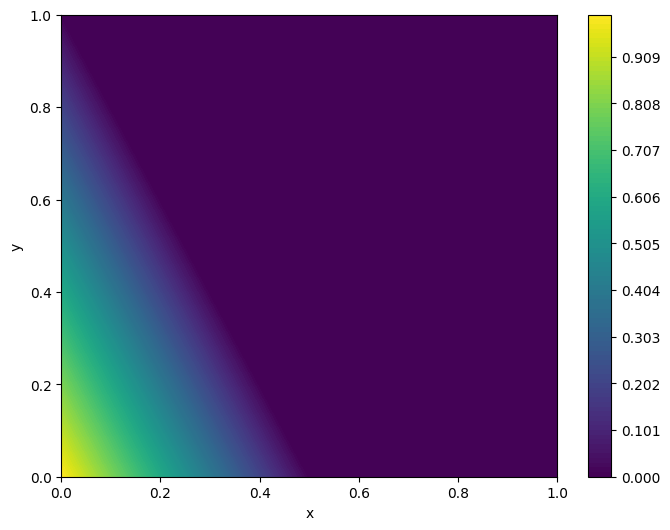

In [26]:
import numpy as np
import matplotlib.pyplot as plt


nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)


def f_corrected(x, y, const=1):
    radius = 0.5  
    f_values = np.zeros_like(x)
    
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            if x[i, j]**2 + y[i, j]**2 < radius**2:  
                if x[i, j] == 0 and y[i, j] == 0:
                    f_values[i, j] = const  
                else:
                    f_values[i, j] = const / (x[i, j] * 2 + y[i, j]**2)
            else:
                f_values[i, j] = 0

    return f_values

f_values_corrected = f_corrected(xv, yv)

plt.figure(figsize=(8, 6))
contour_levels = np.linspace(np.nanmin(f_values_corrected), np.nanmax(f_values_corrected), 100)
contour_plot = plt.contourf(xv, yv, f_values_corrected, cmap='viridis', levels=contour_levels)
plt.colorbar(contour_plot)
plt.xlabel('x')
plt.ylabel('y')
plt.show()
